# SUV dataset

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



## Loading  dataset

In [2]:
suv_df = pd.read_csv('B:\MY Documents\suv-data\suv_data.csv')

In [3]:
suv_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


## Exploratory Data Analysis (EDA)

In [4]:
suv_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


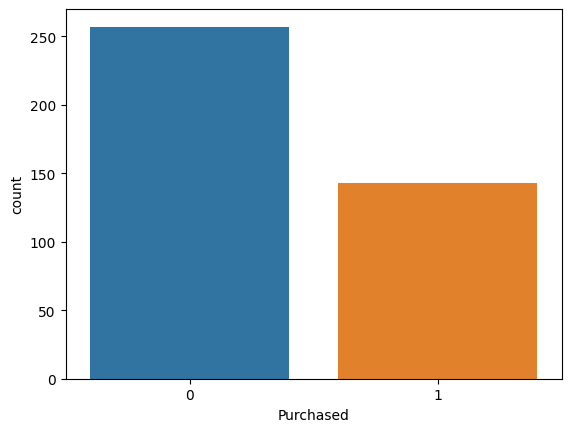

In [5]:
sns.countplot(x='Purchased', data=suv_df)
plt.show()

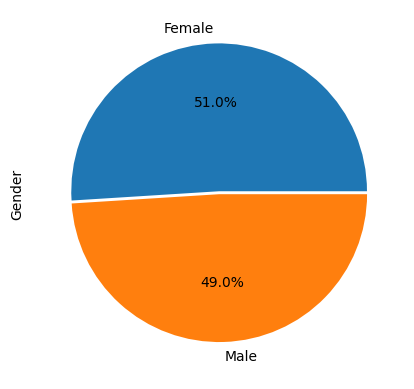

In [6]:
suv_df['Gender'].value_counts().plot.pie(explode=[0.02, 0], autopct='%.1f%%')
plt.show()

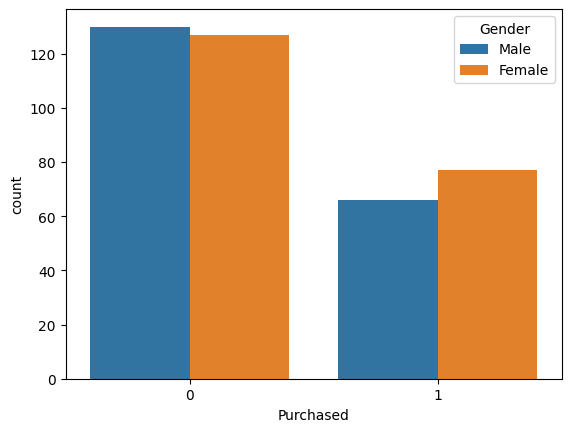

In [7]:
sns.countplot(x='Purchased', hue='Gender', data=suv_df)
plt.show()

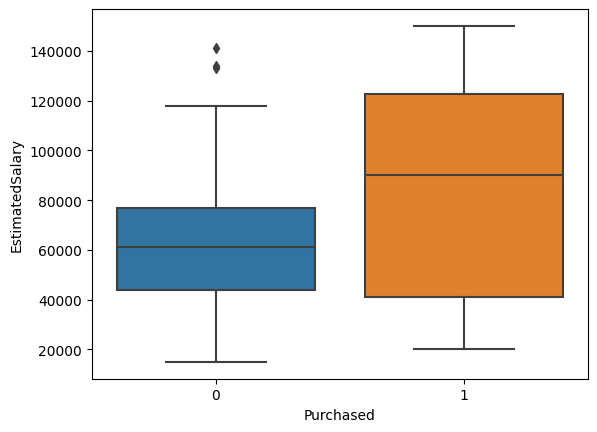

In [8]:
sns.boxplot(x='Purchased', y='EstimatedSalary', data=suv_df)
plt.show()

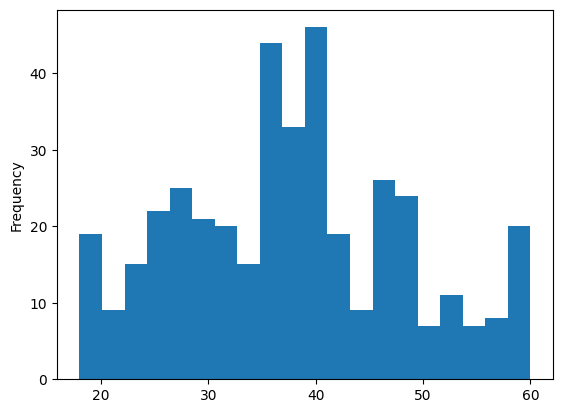

In [9]:
suv_df['Age'].plot.hist(bins=20)
plt.show()

In [10]:
age = suv_df['Age'].apply(lambda x: 'Adult' if x < 35 else 'Youth')

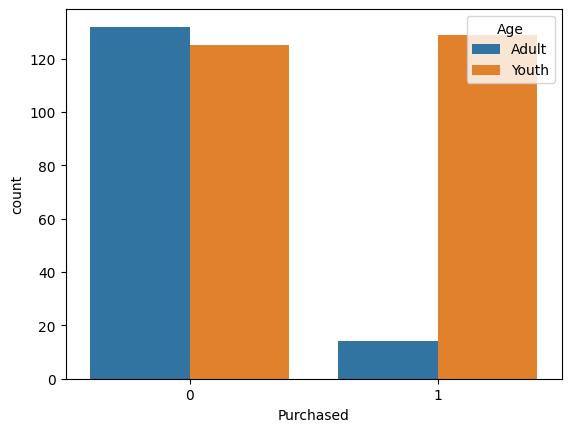

In [11]:
sns.countplot(x=suv_df['Purchased'], hue=age)
plt.show()

## Data Wrangling

In [12]:
suv_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [13]:
# dropping column irrelevant to the analysis
suv_df.drop('User ID', axis=1, inplace=True)

In [14]:
suv_df.head()

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0


In [15]:
# converting categorical variables into numerical encoding
male = pd.get_dummies(suv_df['Gender'], drop_first=True)

In [16]:
# joining numerical encoding and dropping categorical columns
suv_df = suv_df.join(male, how='left')
suv_df.drop('Gender', axis=1, inplace=True)

In [17]:
suv_df.head()

,Age,EstimatedSalary,Purchased,Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,0,0
3,27,57000,0,0
4,19,76000,0,1


## Model Building

### Preprocessing step

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X = suv_df.drop('Purchased', axis=1)
y = suv_df['Purchased']

**NB**: **Male** was not added beacuse of its contribution to the model prediction is minimal in contrast to `Age` and `EstimatedSalary`

In [21]:
# SCaling to reduced the margin of values in the dataset

X = scaler.fit_transform(suv_df[['Age', 'EstimatedSalary']])

### Splitting into Training and Testing Data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [24]:
print(f"Training dataset contains {X_train.shape[1]} columns and {X_train.shape[0]} rows.")
print(f"Testing dataset contains {X_test.shape[1]} columns and {X_test.shape[0]} rows.")

Training dataset contains 2 columns and 320 rows.
Testing dataset contains 2 columns and 80 rows.


### Training the Model

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
logreg_model = LogisticRegression()

In [27]:
logreg_model.fit(X_train, y_train)

LogisticRegression()

In [28]:
predictions = logreg_model.predict(X_test)

### Testing Models Performance

In [29]:
from sklearn.metrics import roc_curve

In [30]:
from sklearn.metrics import classification_report, confusion_matrix

In [31]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.88      0.91      0.89        54
           1       0.79      0.73      0.76        26

    accuracy                           0.85        80
   macro avg       0.83      0.82      0.83        80
weighted avg       0.85      0.85      0.85        80



In [32]:
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))

Confusion Matrix:
[[49  5]
 [ 7 19]]


Below is the coefficient of `Age` and `EstimatedSalary` for the model.

In [33]:
coefficients = logreg_model.coef_
print(f"Coefficients:\n\tAge: {coefficients[0][0]}\n\tEstimatedSalary: {coefficients[0][1]}")

Coefficients:
	Age: 2.158040744242266
	EstimatedSalary: 1.1412622077989236
